# Loan Status Prediction

# Problem Statement:

 To understand relationship between variables(Continuous and Categorical) to take overview of data. Looked onto various terms like gender,education,property area, etc. to predict the loan status of the customer. Apllied SVM,Naive Bayes,Decision Tree,Ranadom Forest,Logistic Regression,to compare accuracy of the model of each classifiaction algorithm.

# Import Libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import seaborn as sb
import numpy as np

# Data Collection and Processing

In [2]:
#loading the dataset to pandas dataframe
A = pd.read_csv("C:/Users/Dell/Downloads/training_set (1).csv")

In [3]:
type(A)

pandas.core.frame.DataFrame

In [4]:
#printing the first 5 rows of the dataframe
A.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#no. of rows and columns
A.shape

(614, 13)

In [6]:
#statistical measures 
A.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#number of missing values in each column
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

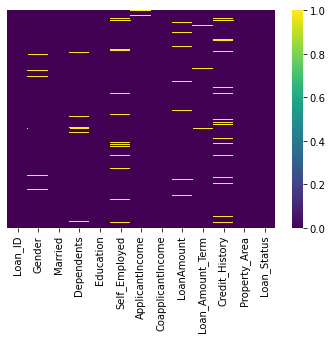

In [8]:
#To analyze them visually, use seaborn to create a simple heatmap to see where is the data missing.
sb.heatmap(A.isnull(), yticklabels = False , cmap = "viridis")

In [9]:
#dropping the missing values
A = A.dropna()

In [10]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

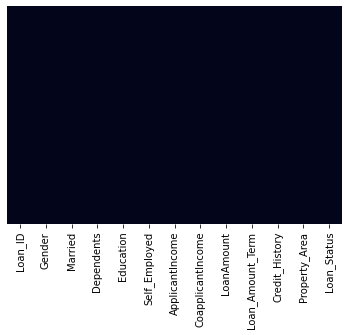

In [11]:
#to check if the values have been removed or not.
sb.heatmap(A.isnull(), yticklabels=False , cbar = False)

In [12]:
#label encoding
A.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [13]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,0


In [14]:
#dependent column values
A['Dependents'].value_counts()

0     273
2      83
1      79
3+     41
Name: Dependents, dtype: int64

In [15]:
#replace all the 3+ values with 4
A = A.replace(to_replace = '3+',value = 4)

In [16]:
A['Dependents'].value_counts()

0    273
2     83
1     79
4     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

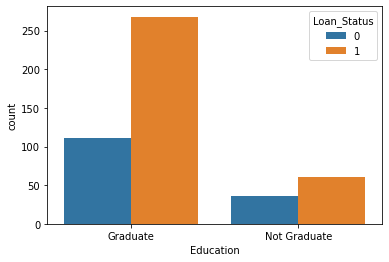

In [17]:
#Eduaction & loan status
sb.countplot(x='Education',hue = 'Loan_Status',data=A)

Analysis: Loan approved for graduate people is more as compared to th eones not graduated

<AxesSubplot:xlabel='Married', ylabel='count'>

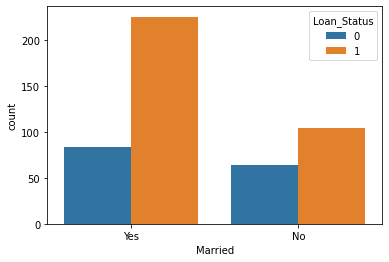

In [18]:
#marital status and loan status
sb.countplot(x='Married',hue = 'Loan_Status',data=A)

<AxesSubplot:xlabel='Gender', ylabel='count'>

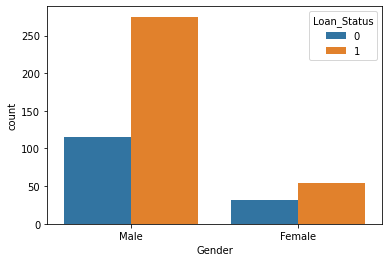

In [19]:
#gender and loan status
sb.countplot(x='Gender',hue = 'Loan_Status',data=A)

# Converting caregorical column into numerical value

In [20]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [21]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [22]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

In [23]:
A.replace({'Gender': {'Male': 1,'Female':0},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate': 0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace = True)


In [24]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333.0,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,4,1,0,3036.0,2504.0,158.0,360.0,0.0,1,0


# Define X and Y

In [25]:
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Y = A[["Loan_Status"]]

In [26]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
2         1        1          0          1              1           3000.0   
3         1        1          0          0              0           2583.0   
4         1        0          0          1              0           6000.0   
6         1        1          0          0              0           2333.0   
7         1        1          4          1              0           3036.0   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0           2900.0   
610       1        1          4          1              0           4106.0   
611       1        1          1          1              0           8072.0   
612       1        1          2          1              0           7583.0   
613       0        0          0          1              1           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [27]:
#splitting the dataset into training dataset and testing dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=31) 

# Classification Algorithms


# Support Vector Machine(SVM)

In [28]:
# Fitting SVM to the Training set
from sklearn import svm
classifier = svm.SVC(kernel='linear')
model = classifier.fit(xtrain,ytrain)

In [29]:
# Predicting the Test set results
pred = model.predict(xtest)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
ytest['Predicted'] = pred
ytest

,Loan_Status,Predicted
7,0,1
258,0,1
217,1,1
365,0,1
180,0,0
...,...,...
531,1,1
140,0,1
511,1,1
75,0,1


In [31]:
#to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest.Loan_Status,pred)

0.6875

In [32]:
#to calculate accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest.Loan_Status,pred)

array([[ 8, 26],
       [ 4, 58]], dtype=int64)

# Naive Bayes

In [33]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model = classifier.fit(xtrain,ytrain)

In [34]:
# Predicting the Test set results
pred = model.predict(xtest)
pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
#to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest.Loan_Status,pred)

0.7604166666666666

In [36]:
#to calculate accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest.Loan_Status,pred)

array([[15, 19],
       [ 4, 58]], dtype=int64)

# Decision Tree Classifier

In [37]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model = classifier.fit(xtrain,ytrain)

In [38]:
# Predicting the Test set results
pred = model.predict(xtest)
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [39]:
#to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest.Loan_Status,pred)

0.6770833333333334

In [40]:
#to calculate accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest.Loan_Status,pred)

array([[16, 18],
       [13, 49]], dtype=int64)

# Random Forest

In [42]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model = classifier.fit(xtrain, ytrain)

In [43]:
#Predicting the Test set results
pred = model.predict(xtest)
pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [46]:
#to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest.Loan_Status,pred)

0.7916666666666666

In [47]:
#to calculate accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest.Loan_Status,pred)

array([[20, 14],
       [ 6, 56]], dtype=int64)

# Logistic Regression

In [48]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
model = classifier.fit(xtrain, ytrain)

In [49]:
#Predicting the Test set results
pred = model.predict(xtest)
pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [50]:
#to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest.Loan_Status,pred)

0.78125

In [51]:
#to calculate accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest.Loan_Status,pred)

array([[15, 19],
       [ 2, 60]], dtype=int64)

Results:
The accuracy of SVM is: 68.75 %

The accuracy of Naive Bayes is: 76.04 %

The accuracy of Decision Tree Classifier is: 67.7 %

The accuracy of Random Forest is: 79.16 %

Thw accuracy of Logistic Regression is: 78.12%